# Creating and Planting Signals Within Noise
Elizabeth Kapelevich

In [63]:
import numpy as np
import math
from scipy import interpolate
import matplotlib.pyplot as plt

### Interpolation

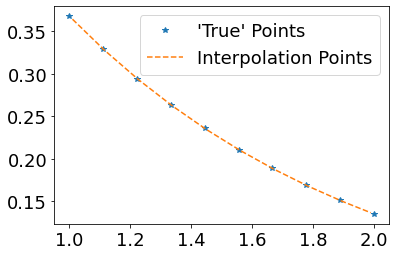

In [143]:
x = np.linspace(1, 2, 10)
y = np.exp(-x)
s = interpolate.interp1d(x, y)
X = np.linspace(1.01, 1.99, 10000)
Y = s(X)
plt.plot(x, y, "*", label = "'True' Points")
plt.plot(X, Y, '--', label = "Interpolation Points")
plt.legend()

### Finding Signals Within Noise
#### (1) Write a function that will take as input:
#### (2) Plot the above function to prove that the signal is at its expected location
#### (3) Once the signal is found, increase signal amplitude and decrease noise amplitude
#### (4) Then, input cross-correlation statistics equation and zero padding

In [144]:
def get_noise(t_0, t_end, del_T):
    
    """
    This function will take as input the boundaries of a time stamp
    from some noise and the interval between each value.
    
    INPUT:
    ------
      t_0 : start time of a data
    t_end : end time of a data
      del_T : interval of time between each value
    
    RETURNS:
    --------
    The time series for random noise.
    
    """

    duration_data = t_end - t_0               
    x = duration_data / del_T
    del_T_prime = duration_data / math.ceil(x)
    
    time_series = np.arange(t_0, t_end + del_T_prime, del_T_prime)
    noise = np.random.random(len(time_series))

    return (time_series, noise, del_T_prime)

## $A^{\frac{{-(t - t_{\rm mean})^2}}{2\sigma}}\sin(2\pi ft)$

In [145]:
def get_signal(A, t_0, t_end, del_T, f, sigma):
    
    """
    This function will take as input the amplitude, boundaries of a time stamp
    from a signal, the frequency, and the standard deviation.
    
    INPUT:
    ------
        f : frequency
        A : amplitude
      t_0 : start time of a signal
    t_end : end time of a signal
    del_T : interval of time between each value
    sigma : standard deviation
    
    RETURNS:
    --------
    The time series for a signal.
    
    """

    duration_signal = t_end - t_0
    
    x = duration_signal / del_T
    
    del_T_prime = duration_signal / math.ceil(x)
    
    t = np.arange(t_0, t_end + del_T_prime, del_T_prime)
    t_mean = (t_0 + t_end) / 2
    
    S = A*np.sin(2*np.pi*f*t)*np.exp((-(t - t_mean)**2)/(2*sigma))

    return (t, S, del_T_prime)

In [153]:
def final_data(a, t_signal_start, t_signal_end, t_noise_start, t_noise_end,
               del_T, f, sigma):
    """
    This function will take as input the amplitude, time boundaries
    of the signal and noise, interval between their values, the
    frequency, and standard deviation.
    
    INPUT:
    ------
             A : amplitude
             f : frequency
         sigma : standard deviation
         del_T : interval of time between each value
   t_noise_end : end time of noise
  t_signal_end : end time of signal
 t_noise_start : start time of noise
t_signal_start : start time of signal
    
    RETURNS:
    --------
    The calculation for cross-correlating a signal embedded 
    within random noise with zero-padding if necessary.
    
    """
    t1, x, del_T_signal = get_signal(a, t_signal_start, t_signal_end,
                                     del_T, f, sigma)
    t2, noise, del_T_noise = get_noise(t_noise_start, t_noise_end, del_T)
    
    s = interpolate.interp1d(t1, x)
    
    index1 = t2 > t1[0]
    index2 = t2 < t1[-1]
    index = index1*index2

    zeroes = np.zeros_like(noise) # allows to create np.array with only zeroes

    signal_time_stamps = t2[index]
    signal = s(signal_time_stamps)

    data_in_signal = noise[index] + signal
    data_before_signal = noise[index2*(~index)]
    data_after_signal = noise[index1*(~index)]

    alldata = np.hstack((data_before_signal, data_in_signal, data_after_signal))
    
    return (t2, alldata)

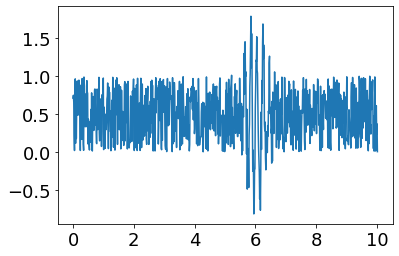

In [156]:
a = 1
signal_start_time = 5
signal_end_time = 7
t_duration = signal_end_time - signal_start_time
noise_start_time = 0
noise_end_time = 10
del_T = 0.012
f = 5
sigma = 0.1
times, alldata = final_data(a, signal_start_time, signal_end_time, noise_start_time,
                           noise_end_time, del_T, f, sigma)
plt.plot(times, alldata)

(-31.43398337469914, 32.62794867238981)

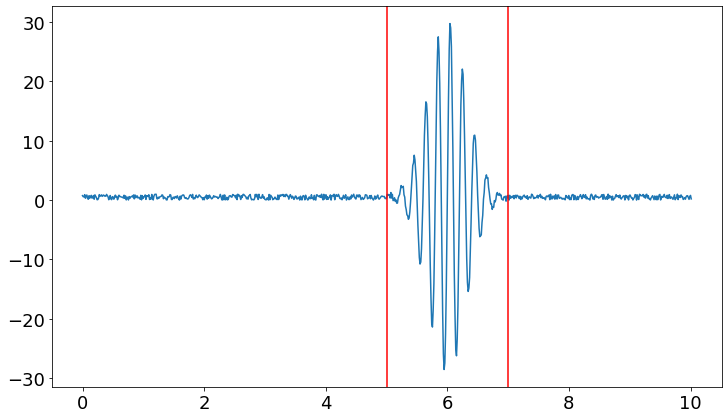

In [147]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,7))
plt.plot(t2, alldata)
ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([5, 5], ylim, 'r-')
plt.plot([7, 7], ylim, 'r-')
plt.ylim(ylim)

#### First create the time-series (np.array), where it starts at t0 and goes on for t_duration in steps of del_T

#### Use sine guassian function to calculate the mean using duration, length, and initial value

#### It should output values and time steps of the signal

#### Save yourself by generating np.array using zero-padding

In [ ]:
def template(f, sigma, t_0, t_duration, del_T):
    """
    This function will take as input the frequency, standard
    deviation, initial time, duration time, and interval
    of time between each value.
    
    INPUT:
    ------
         f : frequency
       t_0 : start time of a signal
     del_T : interval of time between each value
     sigma : standard deviation
t_duration : duration of time for the signal
    
    RETURNS:
    --------
    The template that will match the given signal.
    
    """
    
    
find nearest delta t using np.diff(alldata)[0]

In [ ]:
## remind ghosh that this file is in a directory called matrix_multiply on iterm
## ask him if it should be moved to a new directory called intro_pycbc ??